<a href="https://colab.research.google.com/github/fbeilstein/machine_learning/blob/master/lecture_11_k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introducing k-Means(метод к–середніх)



K-means clustering is a method of vector quantization, originally from signal processing, that is popular for cluster analysis in data mining. k-means clustering aims to partition $n$ observations into $k$ clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. 
The method was originally proposed in $60$s in quantization problem (alike colour qunatization example we will examine).

The k-means algorithm searches for a predetermined number of clusters within an unlabeled multidimensional dataset. 

*   The "cluster center" is the arithmetic mean of all the points belonging to the cluster.

$$
c_k=\frac{\sum_i{a_{ik} x_i}}{n_k}
$$

where $a_{ij}$ shows whether point $i$ belong to the $k$th cluster.

*   Each point is closer to its own cluster center than to other cluster centers.


The k-means clustering technique can be seen as partitioning the space into Voronoi cells (Voronoi, 1907). For each two centroids, there is a line that connects them. Perpendicular to this line, there is a line, plane or hyperplane (depending on the dimensionality) that passes through the middle point of the connecting line and divides the space into two separate subspaces. The k-means clustering therefore partitions the space into k subspaces for which ci is the nearest centroid for all included elements of the subspace (Faber, 1994).

![](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_11/v.png)    




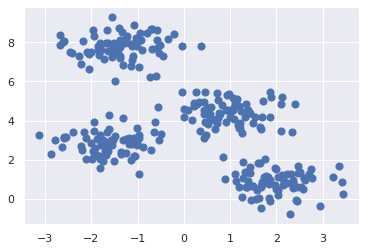

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

Here is the final result.

In [0]:
from sklearn.cluster import KMeans
import ipywidgets as widgets

#@widgets.interact(clusters=(1,6,1))
def plot_kmeans(clusters):
  kmeans = KMeans(n_clusters=clusters)
  kmeans.fit(X)
  y_kmeans = kmeans.predict(X)

  plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
  centers = kmeans.cluster_centers_
  plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

widgets.interact(plot_kmeans, clusters=widgets.IntSlider(min=1,max=6,step=1,value=4));

interactive(children=(IntSlider(value=4, description='clusters', max=6, min=1), Output()), _dom_classes=('widg…

## Lloyd's algorithm theory

Suppose we have a function

$$
L=\sum_{j=1}^K \sum_{i=1}^N a_{ij} \|x_i-\mu_j \|^2 \\
\mu_j=\frac{\sum_{i=1}^N a_{ij} x_i}{\sum_{i=1}^N a_{ij}}
$$

where $a_{ij}$ is either $0$ or $1$ and shows whether or not $i$-th point belongs to the $j$-th cluster.
Such function are called **indicator functions** or **characteristic function** or **boolean predicate function**.

$$
\boldsymbol{1}_A=
\left\{
  \begin{aligned}
  1 \text{ if } x \in A\\
  0 \text{ if } x \notin A\\
  \end{aligned}
  \right.
$$

So

$$
a_{ij}=\boldsymbol{1}_{C_j},
$$

where $C_j$ - is a set of points that we attribute to class $j$.

We can define a variance within a cluster

$$
\text{WCSS}(j)=\sum_{i=1}^N a_{ij} \|x_i-\mu_j \|^2
$$

where $\text{WCSS}$ stands for **W**ithin a **C**laster **S**um of **S**quares.

![](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_11/wcss.png)     

We can than write 

$$
L=\sum_{j=1}^K \text{WCSS}(j)
$$

We want to minimize $L$

$$
(\hat{a}_{ij}, \hat{\boldsymbol{\mu}}_j)=\text{argmin}_{{a}_{ij}, {\boldsymbol{\mu}}_j} L
$$

that is the sum of WCSS's (variances) of all clusters.
We do this in a loop:


1.   Minimize $L$ with respect to $a_{ij}$ with $\boldsymbol{\mu}_j$ given.
2.   Minimize $L$ with respect to $\boldsymbol{\mu}_j$ with $a_{ij}$ given.
3.   Repeat.


$$ \require{enclose}
\enclose{circle}[mathcolor="red"]{\color{black}{1}}
$$

 Suppose that we minimize $L$ with respect to $a_{ij}$ with $\boldsymbol{\mu}_j$ given. It's not hard: we assign $i$ to the cluster with the nearest centroid:

$$
a_{ij}=\left\{
 \begin{align}
   &1 \quad  \text{ if } \quad j=\text{argmin}_l \| x_i-\mu_l\|^2 \\
   &0 \quad \text{otherwise}
 \end{align}
\right.
$$

<br>

$$ \require{enclose}
\enclose{circle}[mathcolor="red"]{\color{black}{2}}
$$

If $a_{ij}$ given how can we minimize $L$ with respect to $\boldsymbol{\mu}_j$?
We calculate gradient and equate it to zero.

$$
\nabla_{\boldsymbol{\mu}_j}L=\nabla_{\boldsymbol{\mu}_j}\sum_{j'=1}^K \sum_{i=1}^N a_{ij'} (\mathbf{x}_i-\boldsymbol{\mu}_{j'})^{\top}(\mathbf{x}_i-\boldsymbol{\mu}_{j'})=\sum_{i=1}^N a_{ij} \nabla_{\boldsymbol{\mu}_j} (\mathbf{x}_i-\boldsymbol{\mu}_{j})^{\top}(\mathbf{x}_i-\boldsymbol{\mu}_{j}) =\sum_{i=1}^N a_{ij} (-2\mathbf{x}_i+2\boldsymbol{\mu}_j)
$$

$$
\nabla_{\boldsymbol{\mu}_j}L=\boldsymbol{0} \quad \Rightarrow \quad \sum_{i=1}^N a_{ij} (-2\mathbf{x}_i+2\boldsymbol{\mu}_j)=\boldsymbol{0}
$$

We now solve for $\boldsymbol{\mu}_j$. 

$$
\sum_{i=1}^n a_{ij} (-2\mathbf{x}_i+2\boldsymbol{\mu}_j)=\boldsymbol{0}
$$

$$
\boldsymbol{\mu}_j=\frac{\sum_{i=1}^N a_{ij} \mathbf{x}_i}{\sum_{i=1}^N a_{ij}}=\frac{\text{sum of points that belong to $j$-th cluster}}{\text{# of points that belong to $j$-th cluster}}.
$$

so 

$$
\boldsymbol{\mu}_j - \text{sample mean(centroid) of points that belong to $j$-th cluster}
$$

<br>

$$ \require{enclose}
\enclose{circle}[mathcolor="red"]{\color{black}{3}}
$$

By repeating above two steps hopefully we attain

$$
(\hat{a}_{ij}, \hat{\boldsymbol{\mu}}_j)=\text{argmin}_{{a}_{ij}, {\boldsymbol{\mu}}_j} L.
$$


#k-Means Algorithm as Expectation–Maximization algorithm

Trial and error algorithm.

1. Guess some cluster centers
2. Repeat until converged
      * E-Step: assign points to the nearest cluster center
      * M-Step: set the cluster centers to the mean

![](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_11/b.png)      





##Number of clusters estimation

###Elbow method

$L$ could be calculated in `scikit` using `KMeans.inertia_` attribute.
When number of clusters increases $L$ decreases. When number of clusters equals number of points $L=0$. That's why it's pointless to minimize $L$ if we want to determine number of clusters automatically. Instead **elbow method** is used:

Find $n_{clusters}$ when function $L(n_{clusters})$ stops decreasing abruptly (forming a kink).






In [5]:
#@title #Elbow method

from sklearn.cluster import KMeans
import ipywidgets as widgets
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

def fit(n):
  kmeans = KMeans(n_clusters=n)
  kmeans.fit(X)
  return kmeans.predict(X), kmeans.cluster_centers_, kmeans.inertia_

N_max = 6
kmeans = [fit(n) for n in range(1, N_max + 1)]

#@widgets.interact(clusters)
def plot_kmeans(clusters):
  y_kmeans, centers, _ = kmeans[clusters - 1]

  fig, (ax_cluster, ax_inertia) = plt.subplots(1, 2, figsize=(12, 6));
  ax_cluster.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis');
  ax_cluster.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

  ax_inertia.plot(range(1, N_max + 1), [k[2] for k in kmeans]);
  ax_inertia.set_title("Total sum of squares L")
  ax_inertia.set_xlabel("Number of clusters")
  ax_inertia.vlines([clusters], 0, 1, 
                    transform=ax_inertia.get_xaxis_transform(), colors='r');


widgets.interact(plot_kmeans, clusters=widgets.IntSlider(min=1,max=N_max,step=1,value=4));



interactive(children=(IntSlider(value=4, description='clusters', max=6, min=1), Output()), _dom_classes=('widg…

This method is often ambiguous and not very reliable, and hence other approaches for determining the number of clusters such as the **silhouette method** are preferable.

###Silhouette method

For each point $p$ a measure $s(p)$ between $-1$ and $1$ is calculated (see   [wiki](https://en.wikipedia.org/wiki/Silhouette_(clustering)) article for details).
* If $p\approx 1$ the point is much closer to the point of its cluster than to the points of other clusters.
* If $p\approx 0$ the point is close to the border of two clusters.
* If $p\approx -1$ the point is close to the points of other clusters.

$s(i)$ is drawn in a form of horizontal histogram. Also mean $s(p)$ for all points is calculated for different $n_{clusters}$. The larger $\langle s \rangle (n_{clusters})$ the better.

In this example the silhouette analysis is used to choose an optimal value for $n_{clusters}$. The silhouette plot shows that the $n_{clusters}$ value of $3$, $5$ and $6$ are a bad pick for the given data due to the presence of clusters with below average silhouette scores and also due to wide fluctuations in the size of the silhouette plots. Silhouette analysis is more ambivalent in deciding between $2$ and $4$.

Also from the thickness of the silhouette plot the cluster size can be visualized. The silhouette plot for cluster $0$ when n_clusters is equal to $2$, is bigger in size owing to the grouping of the $3$ sub clusters into one big cluster. However when the n_clusters is equal to $4$, all the plots are more or less of similar thickness and hence are of similar sizes as can be also verified from the labelled scatter plot on the right.

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.56376469026194
For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


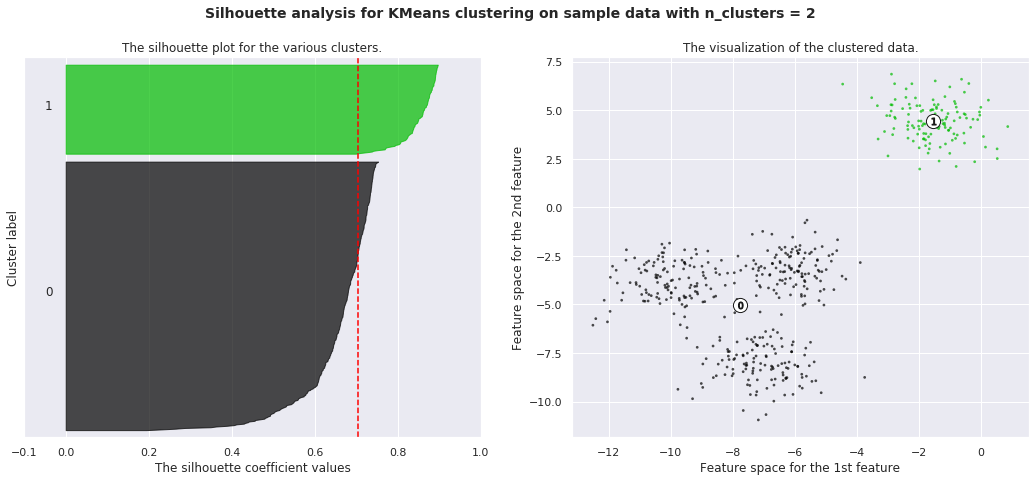

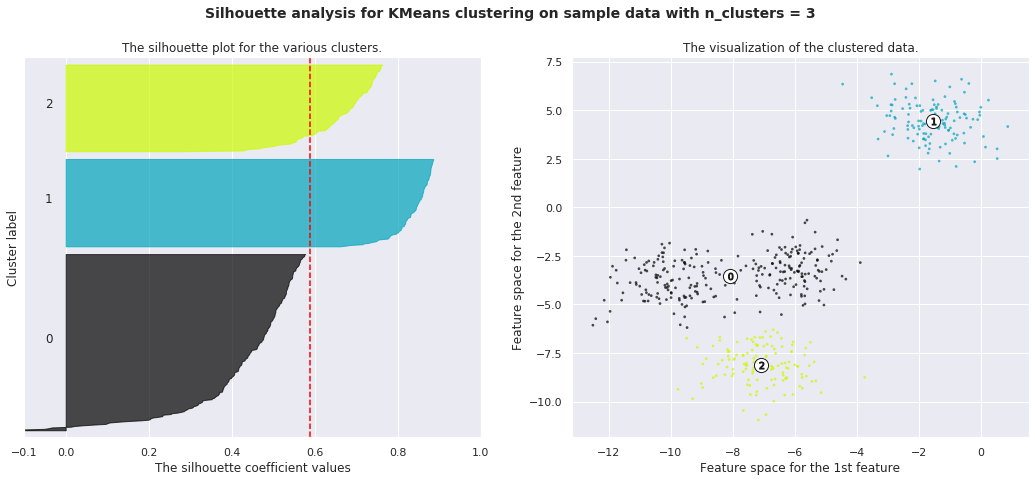

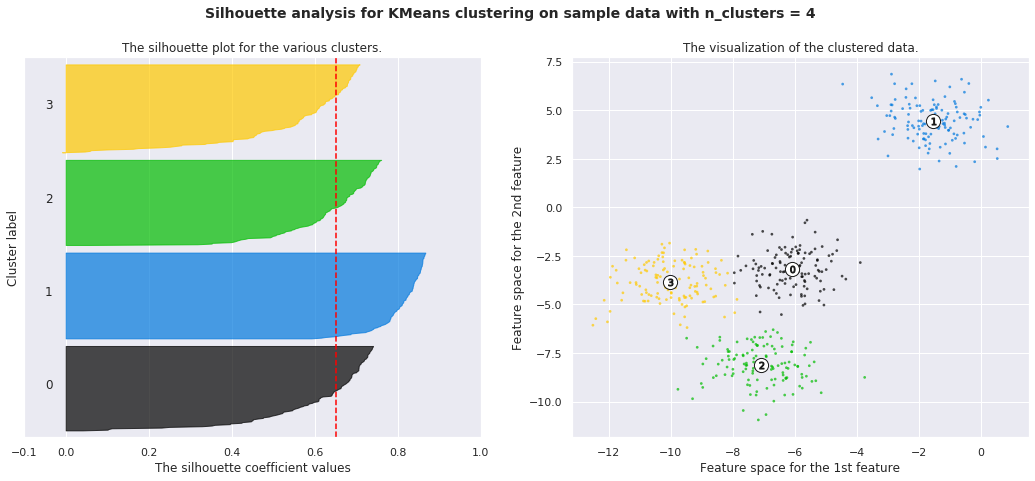

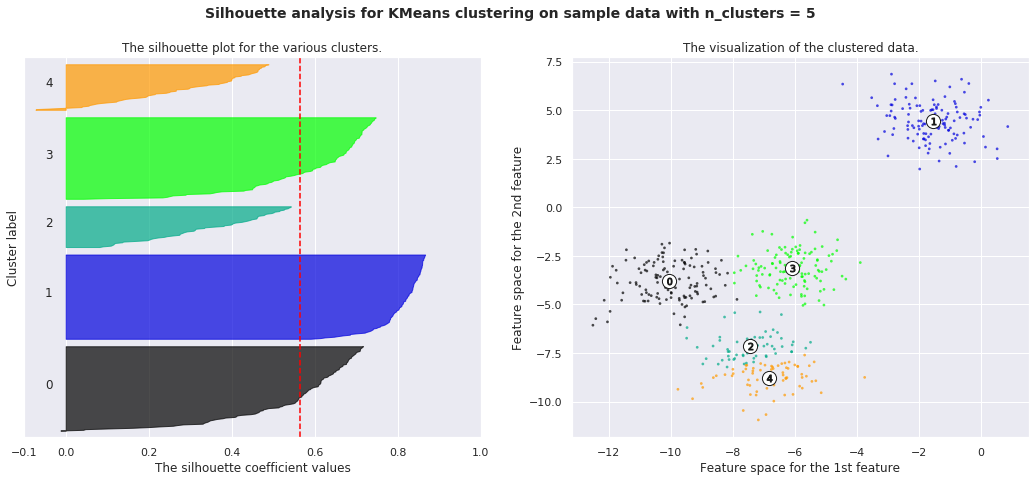

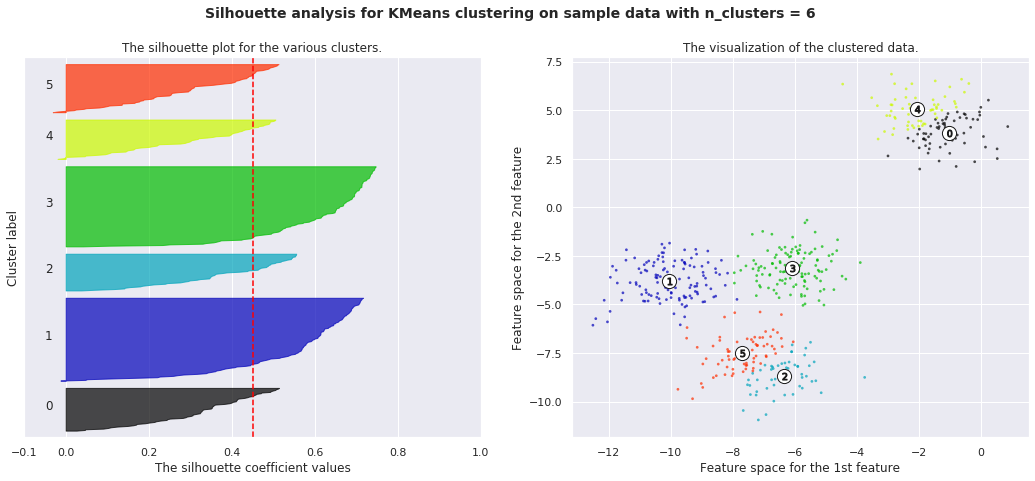

In [0]:
#@title #Silhouette analysis
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

#Initialization

The task of initialization is to form the initial $k$ clusters. Many initializing techniques have been proposed, from simple methods, such as choosing the first $k$ data points, **Forgy initialization** (randomly choosing $k$ data points in the dataset) and **Random partitions** (dividing the data points randomly into $k$ subsets), to more sophisticated methods, such as density-based initialization, Intelligent initialization, **F**urthest **F**irst initialization (**FF** for short, it works by picking the first center point randomly, then adding more center points which are furthest from existing ones), and **S**ubset **F**urthest-**F**irst (**SFF**)initialization. For more details, refer to paper Steinley and Brusco  which provides a survey and comparison of over 12 initialization methods.

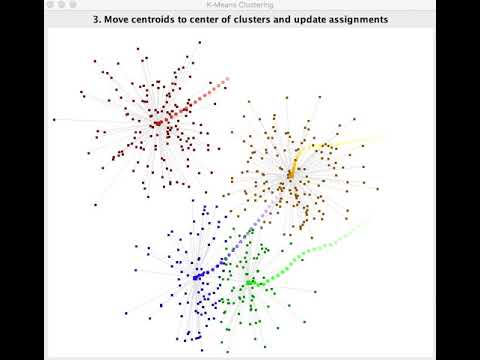

In [0]:
#@title Visualization of k-means clustering { display-mode: "form" }
from IPython.display import YouTubeVideo
YouTubeVideo('nXY6PxAaOk0', width=600, height=400)

Actually basic $k$-means is so simple it could be implemented in a couple of lines

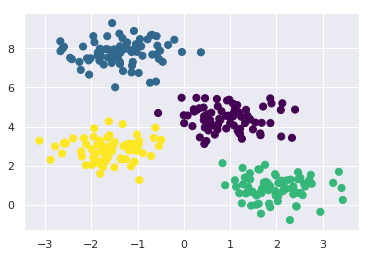

In [0]:
# a very basic implementation of k-means

from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

##Caveats of expectation–maximization

* The globally optimal result may not be achieved. Here is the simpest example

![](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_11/min.png)   

Here is a more elobarate example





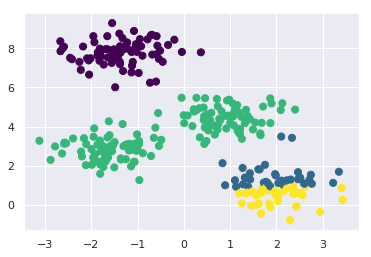

In [0]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

* The number of clusters must be selected beforehand (is fixed by $k$-means++ algo).

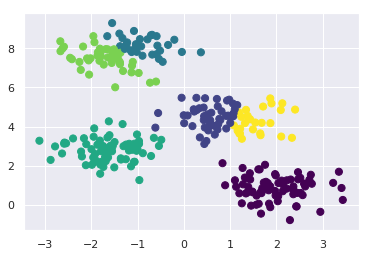

In [0]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

# one may want to check "silhouette analysis" in view of this issue
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

* $k$-means is limited to linear cluster boundaries (spherical clusters)

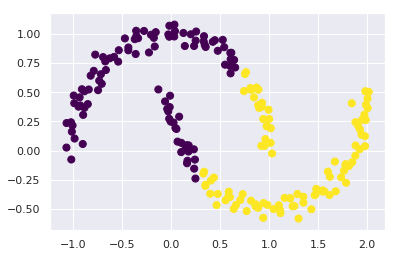

In [0]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

# promising step: project the data into a higher dimension where a linear separation is possible

This situation is reminiscent of the discussion in In-Depth: Support Vector Machines, where we used a kernel transformation to project the data into a higher dimension where a linear separation is possible. We might imagine using the same trick to allow k-means to discover non-linear boundaries.

One version of this kernelized k-means is implemented in Scikit-Learn within the SpectralClustering estimator. It uses the graph of nearest neighbors to compute a higher-dimensional representation of the data, and then assigns labels using a k-means algorithm:
`SpectralClustering` estimator can be helpful

/usr/local/lib/python3.6/dist-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


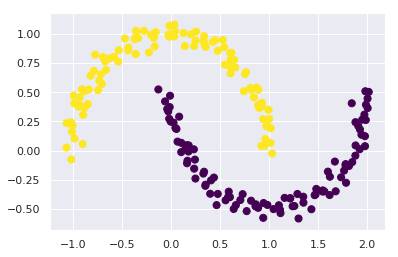

In [0]:
from sklearn.cluster import SpectralClustering

model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

* $k$-means can be slow for large numbers of samples

#Interactible k-means

In [0]:
from sklearn.cluster import KMeans

def cluster(X):
  kmeans = KMeans(n_clusters=2)
  kmeans.fit(X)
  y_kmeans = kmeans.predict(X)
  centers = kmeans.cluster_centers_

  return y_kmeans, centers

In [0]:
#@title K-means
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_clusters(X, y, center):
  fig = plt.figure(figsize=(10,10))
  ax = fig.gca()
  ax.tick_params(axis="y",direction="in", pad=-30)
  ax.tick_params(axis="x",direction="in", pad=-15)
  ax.set_xticks(np.arange(-.75, 1, .25))
  ax.set_yticks(np.arange(-.75, 1, .25))
  ax.set_xlim([-1, 1])
  ax.set_ylim([-1, 1])

  plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
  plt.scatter(center[:, 0], center[:, 1], c='red', marker='x', s=200, alpha=0.5);

  plt.close(fig)

  return fig

import base64
import io

def figure_to_base64(fig):
  buf = io.BytesIO()
  fig.savefig(buf, format='png', bbox_inches='tight', pad_inches=0);
  image_base64 = base64.b64encode(buf.getvalue()).decode('utf-8').replace('\n', '')
  buf.close()
  return image_base64

import json

def invoke(pts):
  data = np.array(pts).reshape((-1, 2))
  X = data / 300.0 - 1.0
  X[:, 1] *= -1.0

  y_kmeans, centers = cluster(X)
  fig = plot_clusters(X, y_kmeans, centers)

  image_base64 = figure_to_base64(fig)
  return IPython.display.JSON({'image': image_base64})


import IPython
from google.colab import output

main_str = '''
  <script type="application/javascript">
  
    var active_pt = null;
    var all_pts = [];
    var classAbtn = [650, 100];
    var classBbtn = [650, 200];
    var ptR = 10.0;
    var params = null;
    var debug_txt = "";
    var bg_image = new Image();

    function is_close(pt1, pt2) {
      return   (pt1[0] - pt2[0])*(pt1[0] - pt2[0])
            +  (pt1[1] - pt2[1])*(pt1[1] - pt2[1])
            <= ptR*ptR;
    }
  
    function circ(ctx, pos) {
      ctx.beginPath();
      ctx.arc(pos[0], pos[1], ptR, 0.0, 2.0 * Math.PI, 0);
      ctx.fillStyle = 'rgba(50, 50, 50, 0.2)';
      ctx.fill();
    }
    
    
    function draw() {
      var canvas = document.getElementById('canvas');
      if (canvas.getContext) {
        var ctx = canvas.getContext('2d');
        
        ctx.clearRect(0, 0, canvas.width, canvas.height); // cleanup before start
        ctx.drawImage(bg_image, 0, 0, 600, 600);
        ctx.strokeRect(0, 0, 600, 600); // field
        
        ctx.font = '20px serif';
        ctx.fillStyle = 'black';
        ctx.fillText('feature', 700, 100);
        ctx.fillText(debug_txt, 200, 200);
        circ(ctx, classAbtn);
        ctx.strokeRect(625, 75, 150, 50);
        
        if (active_pt) {
          circ(ctx, [active_pt[0], active_pt[1]]);
        }
        all_pts.forEach(function (item, index) {
          circ(ctx, [item[0], item[1]]);
        });
        
        
        
      }
    }
    
    var timer
    function init() {
      timer = setInterval(draw, 10);
    }
    
    function mdown_handle(evt) {
      x = evt.offsetX;
      y = evt.offsetY;
      if (is_close([x,y], classAbtn)) {
        active_pt = [x, y]
      }
      idx = -1;
      all_pts.forEach(function (item, index) {
        if (is_close([x,y], [item[0], item[1]])) {
          idx = index;
        }
      });
      if (idx > -1) {
        active_pt = all_pts[idx];
        all_pts.splice(idx, 1);
      }
    }
    
    function mmove_handle(evt) {
      x = evt.offsetX;
      y = evt.offsetY;
      if (active_pt) {
        active_pt[0] = x;
        active_pt[1] = y;
      }
    }
    
    function mup_handle(evt) {
      x = evt.offsetX;
      y = evt.offsetY;
      if (x >= 600) {
        active_pt = null;
      }
      if (active_pt) {
        all_pts.push(active_pt);
        active_pt = null;
      }
    }
    
    async function calculate() {
      if (!all_pts)
        return;
      var merged = [].concat.apply([], all_pts);
      const result = await google.colab.kernel.invokeFunction('notebook.InvSVM', [merged], {});
      params = result.data['application/json'];
      bg_image.src = 'data:image/  png;base64,' + params.image;
    }
  </script>
  <canvas id="canvas" width="800" height="600" 
    onmousedown="mdown_handle(event)"
    onmousemove="mmove_handle(event)"
    onmouseup="mup_handle(event)"></canvas>
  <div style="position:absolute; top:275px; left:625px;">
    <button type="button" onclick="calculate();">
      Cluster
    </button>
  </div>
  <script> init();</script>
'''



def generate_html():
  s = main_str
  return s
  
display(IPython.display.HTML(generate_html()))
    
    
output.register_callback('notebook.InvSVM', invoke)

#Variations of $k$-means

* $k$-medians

* $k$-medoid

$$
x_{medoid}=\text{argmin}_{y \in \{x_1, x_2, \dots x_n \}} \sum_i \|y-x_i \|^2
$$

* $k$-means++

In data mining, k-means++ is an algorithm for choosing the initial values (or "seeds") for the k-means clustering algorithm. It was proposed in 2007 by David Arthur and Sergei Vassilvitskii, as an approximation algorithm for the k-means problem.

* Some methods attempt to speed up each $k$-means step using the triangle inequality:

$$
\|x-z\|\leq \|x-y\|+\|y-z\|.
$$

* Fuzzy clustering (soft $k$-means) - a form of clustering in which each data point can belong to more than one cluster.

In fuzzy k-means clustering (Bezdek, 1981), each case has
a set of degree of belonging relative to all clusters. It differs
from previously presented k-means clustering where each
case belongs only to one cluster at a time. In this algorithm,
the centroid of a cluster (ck) is the mean of all cases in the
dataset, weighted by their degree of belonging to the cluster

$$
c_k=\frac{\sum_i{w_k(x_i) \cdot x_i}}{\sum_i{w_k(x_i)}}
$$

The degree of belonging is a function of the distance of
the case from the centroid, which includes a parameter
controlling for the highest weight given to the closest case. It
iterates until a user-set criterion is reached. Like the k-means
clustering technique, this technique is also sensitive to initial
clusters and local minima. It is particularly useful for dataset
coming from area of research where partial belonging to
classes is supported by theory. 

* Escape local optima by swapping points between clusters introducing noise to escape local minima.

#Examples

## Optical recognition of handwritten digits

Suppose you have $1797$ images($8$x$8$) of digits $0 \dots 9$.
This dataset originates from [dataset](https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits)
compiled by NIST(**N**ational **I**nstitute of **S**tandards and **T**echnology) from a total of $43$ people, $30$ contributed to the training set and different $13$ to the test set. 

In [0]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

We claster them  into $10$ categories.

In [0]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

NameError: ignored

These are the centers (they clearly resemble digits $0..9$).

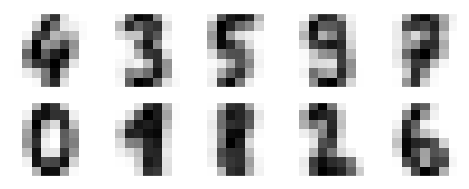

In [0]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

The dataset actually includes training set with true tags included so we can verify the prediction.
It turns out that $\approx 80 \%$ of images it got right.

In [0]:
#match clusters with real labels
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]
    
# and check the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

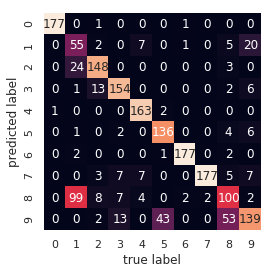

In [0]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

# we can essentially build a digit classifier without reference to any known labels!

We see that $1$ and $8$ are frequently confused with $9$ and $9$ with $5$.

ust for fun, let's try to push this even farther. We can use the t-distributed stochastic neighbor embedding (t-SNE) algorithm (mentioned in In-Depth: Manifold Learning) to pre-process the data before performing k-means. t-SNE is a nonlinear embedding algorithm that is particularly adept at preserving points within clusters. 

If we use **t**-distributed **S**tochastic **N**eighbor **E**mbedding (T-розподілене вкладення стохастичної близькості) the accuracy $\approx 93 \%$.
Laurens van der Maaten 

In [0]:
# t-SNE before k-Means
from sklearn.manifold import TSNE

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# Compute the clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# Compute the accuracy
accuracy_score(digits.target, labels)

0.9326655537006121

##Color quantization 

Suppose you have a true color image ($24$-bit per pixel) and you want to convert it to $4$-bit per pixel image.
$24$-bit allow you to represent $2^{24}= 16. 777. 216\approx 16 \text{ million}$ colors, while $4$ bits allow for only $2^4 = 16$ colors.

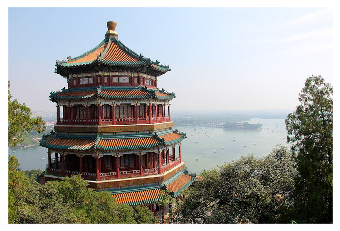

In [0]:
from sklearn.datasets import load_sample_image

china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

BTW, this is The Summer Palace -- a vast ensemble of lakes, gardens and palaces in Beijing. 

Anyways, the image has dimensions $427$ x $640$ with $3$ $8$-bit numbers($0 \dots 255$) per pixel.

In [0]:
china.shape

(427, 640, 3)

First we faltten out our array into $1D$ array of float numbers $0\dots 1$.

In [0]:
# no geometry information is needed
data = china / 255.0 
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

We can visualize these pixels in this color space, using a subset of $10,000$ pixels for efficiency:

In [0]:
# visualize a subset of 10,000 pixels in color space
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(R, G, B, color=colors, marker='.')
    plt.show()
    
    
    #fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    #ax[0].scatter(R, G, color=colors, marker='.')
    #ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    #ax[1].scatter(R, B, color=colors, marker='.')
    #ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    #fig.suptitle(title, size=20);
#plot_pixels(data, title='Input color space: 16 million possible colors')

We now peform k-means algorithm with $16$ clusters.

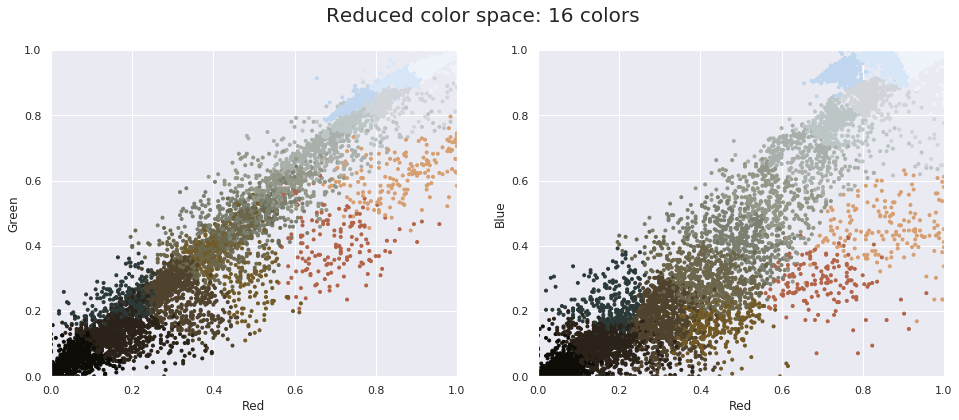

In [0]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors, title="Reduced color space: 16 colors")

Here is the result

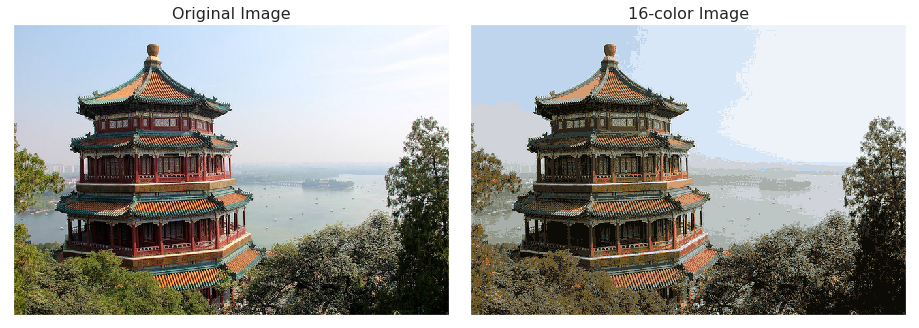

In [0]:
# look at the result

china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);

Some detail is certainly lost in the rightmost panel, but the overall image is still easily recognizable. This image on the right achieves a compression factor of around $1 \text{million}$! While this is an interesting application of k-means, there are certainly better way to compress information in images. But the example shows the power of thinking outside of the box with unsupervised methods like $k$-means.